<a href="https://colab.research.google.com/github/Henil21/Classification-with-TensorFlow-/blob/main/Neural_network_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow ⛹
**A classification problem involves predicting whether something is one thing or another.**

* Binary classification
* multiclass classification
* multilabel classification

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import numpy as np
# making 1000 example
n_sample=1000
# create circle
x,y =make_circles(n_sample, 
                  noise=0.03,
                  random_state=42)

In [2]:
# lets check lables
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

**our data is hard to understand lets visualize it.! 👀**

In [4]:
import pandas as pd 
circles=pd.DataFrame({"X0":x[:,0],"x1":x[:,1],"label":y})
circles

,X0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


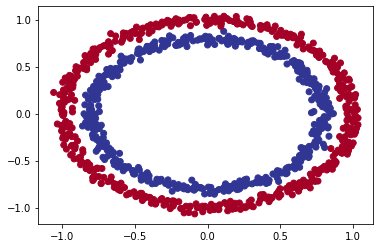

In [5]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

# Input & Output Shape 📄

In [6]:
# checking shape
x.shape , y.shape

((1000, 2), (1000,))

In [7]:
# viewing firste example of features and labels
x[120],y[120]

(array([ 0.18300488, -0.78821267]), 1)

# **Steps in modelling ⚡**
* Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

* In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* creating or importing a model
* compiling the model
* fitting the model
* evaluate the model
* tweak the model 
* evaluate .....

In [8]:
tf.random.set_seed(42)

# creating a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#  compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1.fit(x,y,epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


**its only 48% (0.4830) accurate lets evaluate it and improve it ⚙**

##  improving model ⌨
1. Creating a model - here you might want to add more layers, increase the 
number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).


In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0) # fit for 100 passes of the data

**To visualize our model's predictions we're going to create a** function `plot_decision_boundary()` which:

* Takes in a trained model, features (X) and labels (y).

* Creates a meshgrid of the different X values.

* Makes predictions across the meshgrid.

* Plots the predictions as well as a line between the different zones (where each unique class falls).

* If this sounds confusing, let's see it in code and then see the output.

🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [10]:
import numpy as np

In [11]:
def plot_decision_boundary(model,x,y):
  """
  plots the decison boundary created by a model predicting on x
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  x_min,x_max  =x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max =x[:,1].min()-0.1,x[:,1].max()+0.1

  # (linspace) return evenly space number between x_min,x_max 
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  x_in=np.c_[xx.ravel(),yy.ravel()]
# making prediction
  y_pred=model.predict(x_in)
  # check for multi class
  if len(y_pred[0])>1:
    print("multiclass")
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("binary")
    y_pred=np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


  # plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  # plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

binary


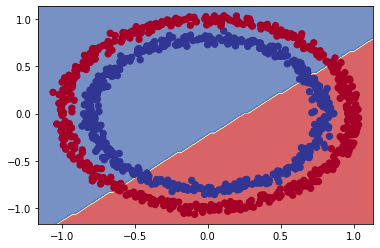

In [12]:
# checking out the prediction
plot_decision_boundary(model_3,x=x,y=y)

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

In [14]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100,
            verbose=0)

Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

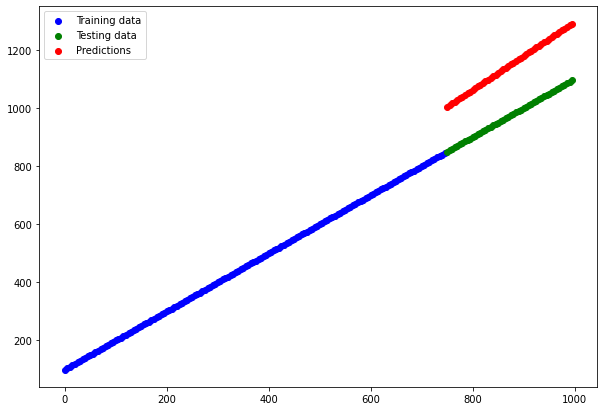

In [15]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# **Missing piece:non-linearity 〰**

In [16]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])
history=model_4.fit(x,y,epochs=100,verbose=0)

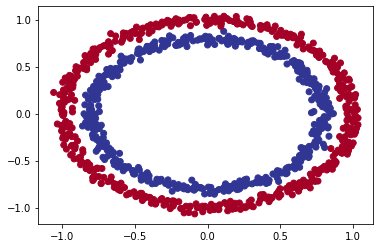

In [17]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

binary


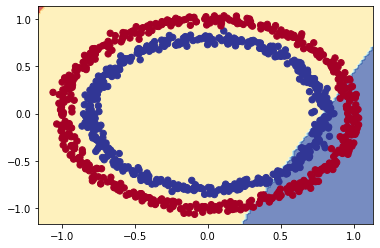

In [18]:
plot_decision_boundary(model_4,x=x,y=y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

In [19]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# model_5.fit(x,y,epochs=100)
history = model_5.fit(x, y, epochs=100,verbose=0)

What we if increased the number of neurons and layers ❓

In [20]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
 tf.keras.layers.Dense(4,activation='relu'),   
 tf.keras.layers.Dense(4,activation='relu'),
 tf.keras.layers.Dense(1)
])
 
model_6.compile(loss=tf.keras.losses.binary_focal_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.fit(x,y,epochs=100,verbose=0)

binary


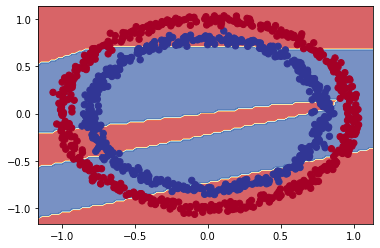

In [21]:
plot_decision_boundary(model_6,x,y)

In [22]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='elu'),
    tf.keras.layers.Dense(4,activation='elu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
history=model_7.fit(x,y,epochs=25,verbose=1)

Epoch 1/25
32/32 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.5760
Epoch 2/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5670
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5530
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5930
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5660
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5560
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5880
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.5570
Epoch 9/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.5800
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5650
Epoch 11/25
32/32 [

binary


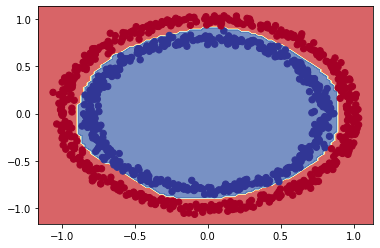

In [23]:
plot_decision_boundary(model_7,x,y)


 **Question**: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

**🔑 Note**: The combination of **linear (straight lines) and non-linear (non-straight lines)** functions is one of the key fundamentals of neural networks.

**To get some intuition** about the activation functions we've just used, let's create them and then try them on some toy data.

In [24]:
# Create a toy tensor (similar to the data we pass into our model)
a=tf.cast(tf.range(-10,10),tf.float32)

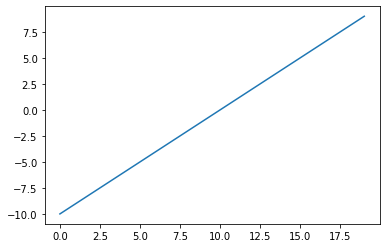

In [25]:
plt.plot(a)

**lets** try to replicate the sigmoid function ⚔

 [sigmoid(x)](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)= 1 / (1 + exp(-x))

In [26]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

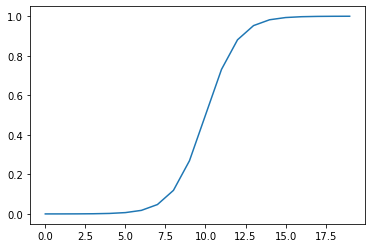

In [27]:
plt.plot(sigmoid(a))

In [28]:
# ReLu
def relu(x):
  return tf.maximum(0,x)
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

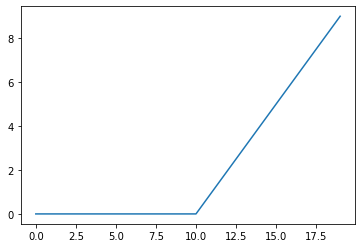

In [29]:
plt.plot(relu(a))

# **Evaluating and improving our classification model ⛲**
we were traning and testing on same data 

which is basically sin 💀 in machine_learning

Lets create traning and testing data

In [30]:
len(x)

1000

In [31]:
# spliting data
X_train,y_train=x[:800],y[:800]
X_test,y_test=x[800:],y[800:]

In [32]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 1.0000


[0.04642655327916145, 1.0]

binary
binary


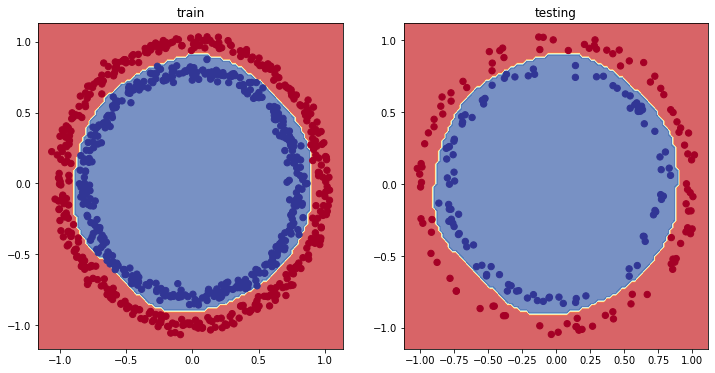

In [33]:
# plot the decision boundary for test and traning data set
plt.figure(figsize=(12,6))
# this subplot is for training data 
plt.subplot(1,2,1)
# 1 row 2 column 
plt.title("train")
plot_decision_boundary(model_7,x=X_train,y=y_train)
# this subplot is for Testing  data 
plt.subplot(1,2,2)
plt.title("testing")
plot_decision_boundary(model_7,x=X_test,y=y_test)

# Plot the loss (or training) curves

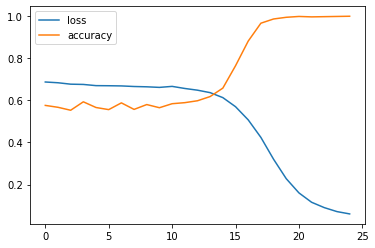

In [34]:
pd.DataFrame(history.history).plot()

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels

## Finding the best learning rate 🔎
To find the ideal learning rate  we're going tp use the following steps:

* A learning rate **callback**-extra piece of funtionality we can add to our **while** its training.

* A modified loss curve plot.

In [35]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_8.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# creating a learning rate call back
lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20) )
# fitting with schedular
history_8=model_8.fit(X_train,y_train, epochs=100, callbacks=[lr_schedular],verbose=0)

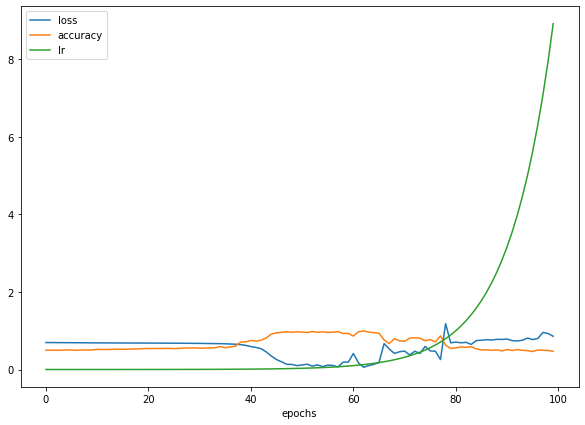

In [36]:
pd.DataFrame(history_8.history).plot(figsize=(10,7),xlabel="epochs")

Text(0, 0.5, 'loss')

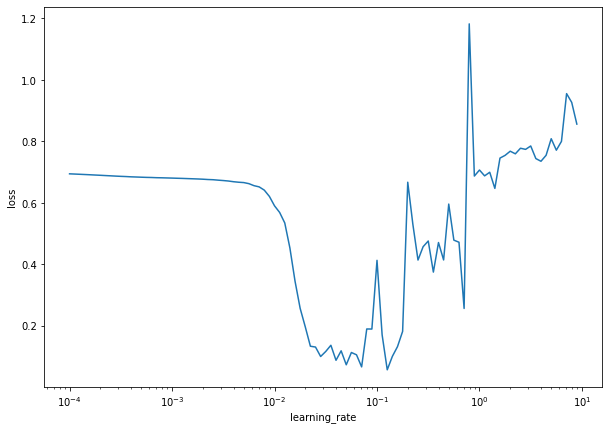

In [37]:
# Plot the learning rate VS the loss
lrs= 1e-4*(10**(tf.range(100)/20))
# len(lrs)
plt.figure(figsize=(10,7))

# making graph with log power in x axis(semilogx)
plt.semilogx(lrs,history_8.history["loss"])

plt.xlabel("learning_rate")
plt.ylabel("loss")

In [38]:
# lets try using higher *ideal* learning rate with same model
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])
history_9=model_9.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

binary
binary


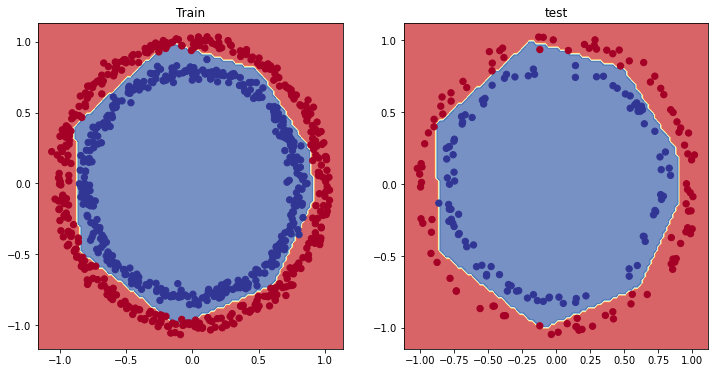

In [39]:
# pd.DataFrame(history_9.history).plot(figsize=(10,7))
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,x=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_9,x=X_test,y=y_test)
plt.show()

## More classification evaluation methods


Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

* Accuracy
* precision
* recall
* F1-score
* confusion matrix
* classification report(from Scikit-learn)-https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [40]:
loss,accuracy=model_9.evaluate(X_test,y_test)
print(f"model loss on the test set:{loss}")
print(f"model accuracy on the test set:{(accuracy*100):2f}%")

# :2f round up upto 2 decimal values

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
model loss on the test set:0.05740184709429741
model accuracy on the test set:99.000001%


## Confusion matrix 🤔

In [41]:
from sklearn.metrics import confusion_matrix

# Making predictions
y_pred=model_9.predict(X_test)
# confusion_matrix(y_test,y_pred)

In [42]:
y_pred[:5]

array([[0.9852654 ],
       [0.9992379 ],
       [0.9903235 ],
       [0.9970694 ],
       [0.39622977]], dtype=float32)

In [43]:
y_test[:5]

array([1, 1, 1, 1, 0])

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called **prediction probabilities.** The standard output  form the sigmod or softmax activation function 

In [44]:
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [45]:
confusion_matrix(y_test,tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

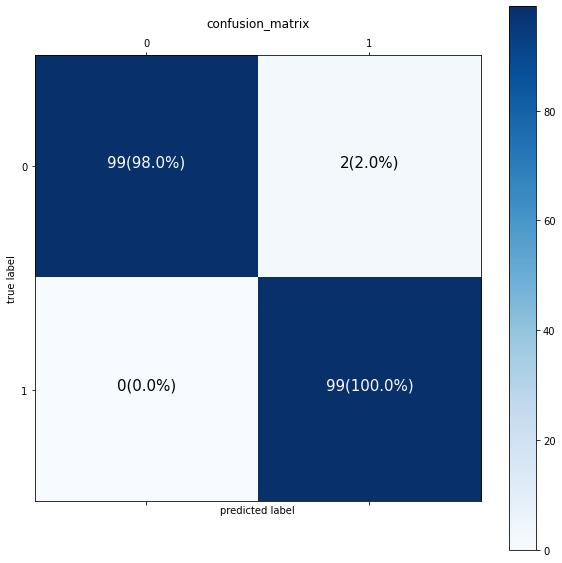

In [46]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools
figsize=(10,10)

# creating confusion matrix
cm=confusion_matrix(y_test,tf.round(y_pred))
# creating normalize confusion matrix
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]


# let's prettify it
fig,ax=plt.subplots(figsize=figsize)
# create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)  # Display an array as matrix in new fig windows
fig.colorbar(cax)
classes=False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])
# label the axes
ax.set(title="confusion_matrix",
       xlabel="predicted label",
       ylabel='true label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes), 
       xticklabels=labels,
       yticklabels=labels)
# set treshold for diff colors
threshold=(cm.max()+cm.min())/2

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color='white' if cm[i,j]>threshold else "black",
           size=15) 



# **Multiclass classification ✍**
When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

* 📖 Resource: The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

* For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [48]:
# show the first training example
print(f"training sample:\n{train_data[0]}\n")
print(f"training sample:\n{train_labels[0]}\n")


training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [49]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

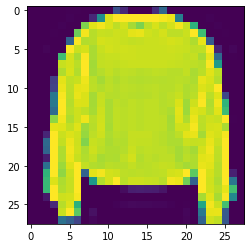

In [50]:
# plot a single sample
import matplotlib.pyplot as plt

# imshow is used to show image
plt.imshow(train_data[7])

In [51]:
train_labels[7]

2

In [52]:
#  creating a small list so we can index onto our training labels so they're human-readable form
class_name=['T-shirt/Top',"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Sandal')

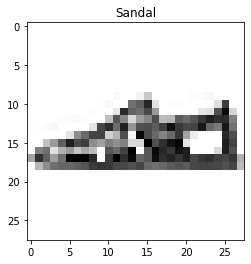

In [53]:
# Plot an example image and its label
index_of_choice=201
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

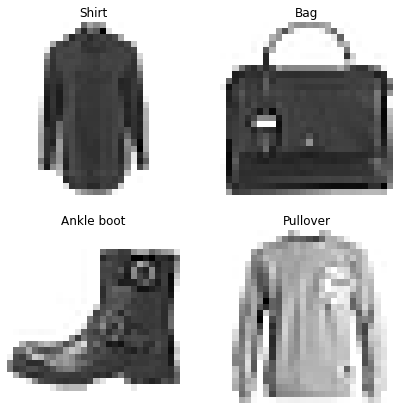

In [54]:
# Ploting multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

## Building multiclass classification

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).

* The output shape will have to be 10 because we need our model to predict for 10 different classes.
We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.

* We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().

* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [55]:
tf.random.set_seed(42)

model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),   # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
non_norm_history=model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

# using validation_data we can evaluate at same time

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

 🔑 Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss.

In [56]:
# check model summary
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 3140      
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [57]:
# check the min and max value of train data
train_data.min(),train_data.max()

(0, 255)

Well, right now, the data we have isn't between 0 and 1, in other words, it's not **normalized**.Its between 0 and 255

In [58]:
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [59]:
# now our data is normalized lets build model to find pattern

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

🔑 **Note** Neural network tends to prefer data in numerical form as well as scaled/normalized(number between 0 & 1 ).



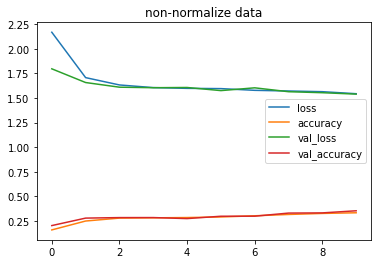

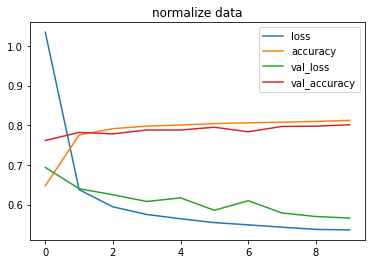

In [60]:
import pandas
# plotting non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="non-normalize data")

pd.DataFrame(norm_history.history).plot(title="normalize data")


## finding ideal learning rate

In [61]:
tf.random.set_seed(42)

model_13=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')

 ])
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# createing learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))



# Fit the model (to the normalized data)
find_lr_history = model_13.fit(train_data,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data, test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'finding the lrarning rate')

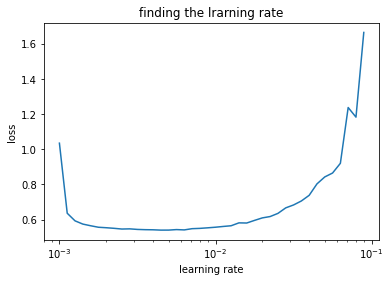

In [62]:
# plot lr decay curve
lrs= 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel('loss')
plt.title("finding the lrarning rate")

In [63]:
10**-3

0.001

Above is our ideal learning rate

In [64]:
tf.random.set_seed(42)

model_14=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(4,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')

 ])
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# createing learning rate callback
# lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))



# Fit the model (to the normalized data)
find_lr_history = model_14.fit(train_data,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data, test_labels),
                           )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## evaluate our multiclass classification model ⛳


In [65]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None, figsize=(10,10),text_size=15): 
    # creating confusion matrix
    cm=confusion_matrix(y_true,y_pred)
    # creating normalize confusion matrix
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]


    # let's prettify it
    fig,ax=plt.subplots(figsize=figsize)
    # create a matrix plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)  # Display an array as matrix in new fig windows
    fig.colorbar(cax)

    if classes:
      labels=classes
    else:
      labels=np.arange(cm.shape[0])
    # label the axes
    ax.set(title="confusion_matrix",
          xlabel="predicted label",
          ylabel='true label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes), 
          xticklabels=labels,
          yticklabels=labels)
    # set treshold for diff colors
    threshold=(cm.max()+cm.min())/2

    #plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
              horizontalalignment="center",
              color='white' if cm[i,j]>threshold else "black",
              size=15) 

# **argmax()**

[Argmax](https://www.sharpsightlabs.com/blog/numpy-argmax/)

🔑 **the argmax function returns the index of the maximum value of a Numpy array.**
```
# See the predicted class number and label for the first example
y_prob[0].argmax(), class_name[y_prob[0].argmax()]
```


In [66]:
#  make some predictions with our model

# the argmax function returns the index of the maximum value of a Numpy array.
y_prob=model_14.predict(test_data)
# See the predicted class number and label for the first example
y_prob[0].argmax(), class_name[y_prob[0].argmax()]


y_preds=y_prob.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 3, 1, 5])

In [67]:
# compareing the predction
y_preds[:10]==test_labels[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

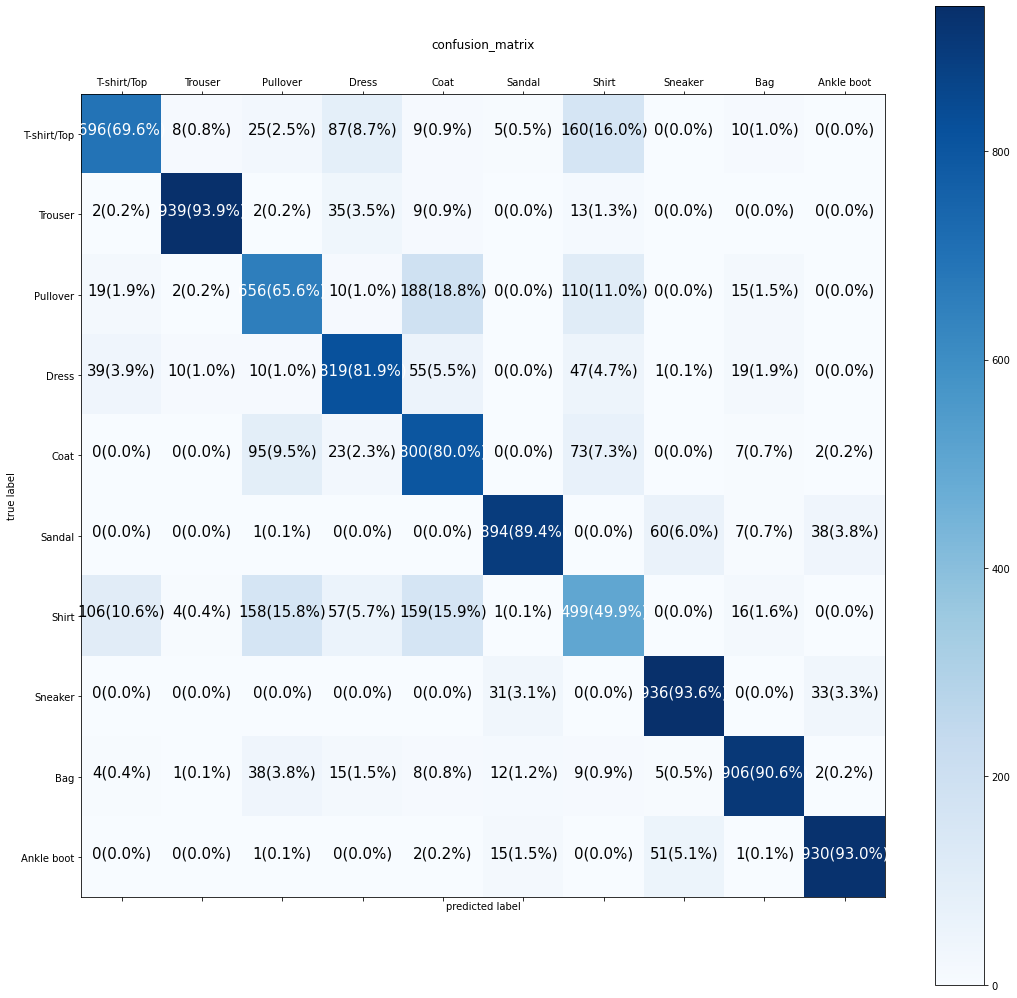

In [69]:
make_confusion_matrix(y_true=test_labels,
                 y_pred=y_preds,
                 classes=class_name,
                 figsize=(18,18),
                 text_size=10)

🔑 often when working with images and other forms of visual data its a good idea to devlop a further understanding of the data and the input and output of our model


Let's create a function to plot a random image along with its prediction.

In [70]:
import random
def plot_random_image(model,images,true_labels,classes):
  """
  picks a random image , plot it and labels it with a  prediction and truth label.
  """
  i =random.randint(1,len(images))
  traget_image=images[i]
  pred_probs =model.predict( traget_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # plot the image
  plt.imshow(traget_image,cmap=plt.cm.binary)
  # change the color of the titles depending on if the prediction is true or wrong
  if pred_label ==true_label:
    color="green"
  else:
    color="red" 
  plt.xlabel("pred:{}{:2.0f}%(True:{})".format(pred_label,100*tf.reduce_max(pred_probs),
             true_label) ,
             color=color)


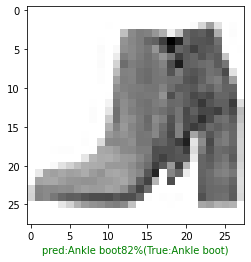

In [71]:
# checking our above function
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_name)

## What pattern is our model learning 

In [72]:
# find the layers of our most recent model
model_14.layers

In [73]:
# Extract a particular layer and find pattern learned by particular layer
weigths,biases=model_14.layers[1].get_weights()
weigths,weigths.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

lets checek the bias vector...

* every neuron has a bias vector. Each of these is paired with a weights matrix.


The bias also get initalized as zeros (in case of dense layer)

The bias vector dicatates how much the pattern within the corresponding weights matrix should influence the next layers

In [74]:
# Bias and biases shapes
biases,biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

In [76]:
model_14.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 4)                 3140      
                                                                 
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dense_33 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


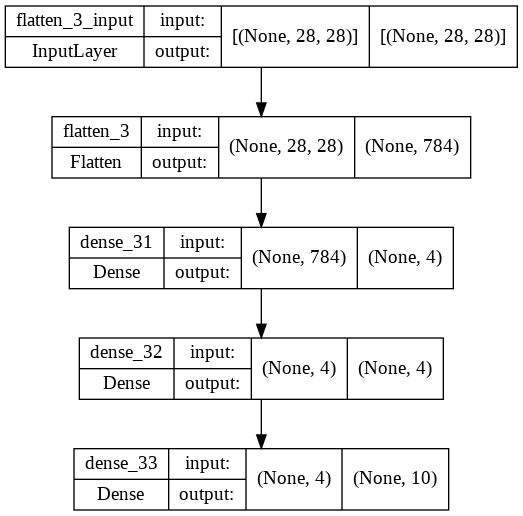

In [78]:
# lets check out another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model
# see the input and output of each layer
plot_model(model_14,show_shapes=True)